In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rice_paddy_crop_yield.csv to rice_paddy_crop_yield (1).csv


In [ ]:
df = pd.read_csv("rice_paddy_crop_yield.csv")
df.head()

,Area Code,Country,Crop_Item,Year,Yield_Value,Pesticide_Value,Avg_Rainfall_mm,Avg_Temperature_celsius
0,2,Afghanistan,"Rice, paddy",1961,15190,36861.81242,1149.958504,14.23
1,2,Afghanistan,"Rice, paddy",1962,15190,36861.81242,1149.958504,14.10
2,2,Afghanistan,"Rice, paddy",1963,15190,36861.81242,1149.958504,15.01
3,2,Afghanistan,"Rice, paddy",1964,17273,36861.81242,1149.958504,13.73
4,2,Afghanistan,"Rice, paddy",1965,17273,36861.81242,1149.958504,13.90


In [ ]:
print(df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 12050 entries, 0 to 12071
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area Code                12050 non-null  int64  
 1   Country                  12050 non-null  object 
 2   Crop_Item                12050 non-null  object 
 3   Year                     12050 non-null  int64  
 4   Yield_Value              12050 non-null  int64  
 5   Pesticide_Value          12050 non-null  float64
 6   Avg_Rainfall_mm          12050 non-null  float64
 7   Avg_Temperature_celsius  12050 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 847.3+ KB
None
Area Code                  0
Country                    0
Crop_Item                  0
Year                       0
Yield_Value                0
Pesticide_Value            0
Avg_Rainfall_mm            0
Avg_Temperature_celsius    0
dtype: int64
          Area Code          Year    Yield_

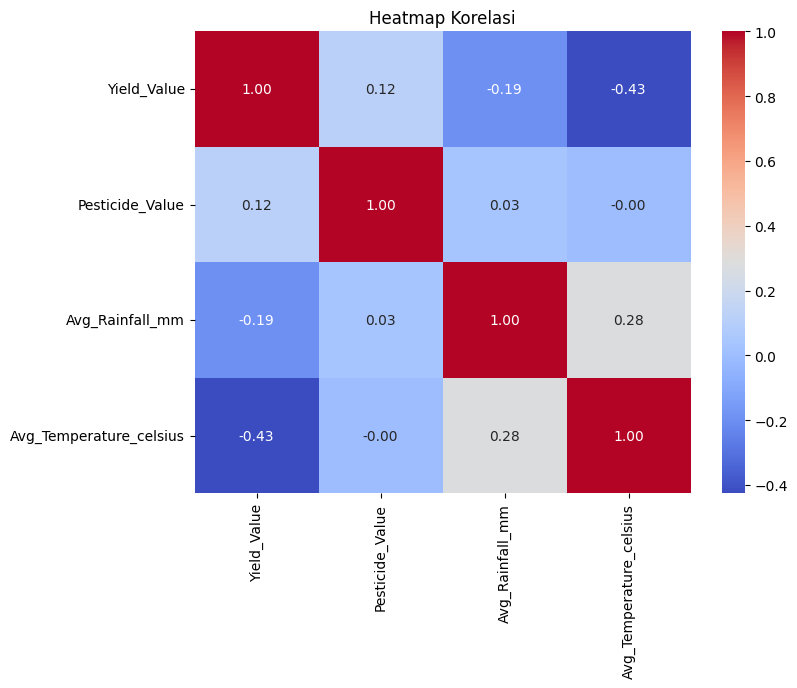

In [ ]:
numerical_cols = ['Yield_Value', 'Pesticide_Value', 'Avg_Rainfall_mm', 'Avg_Temperature_celsius']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

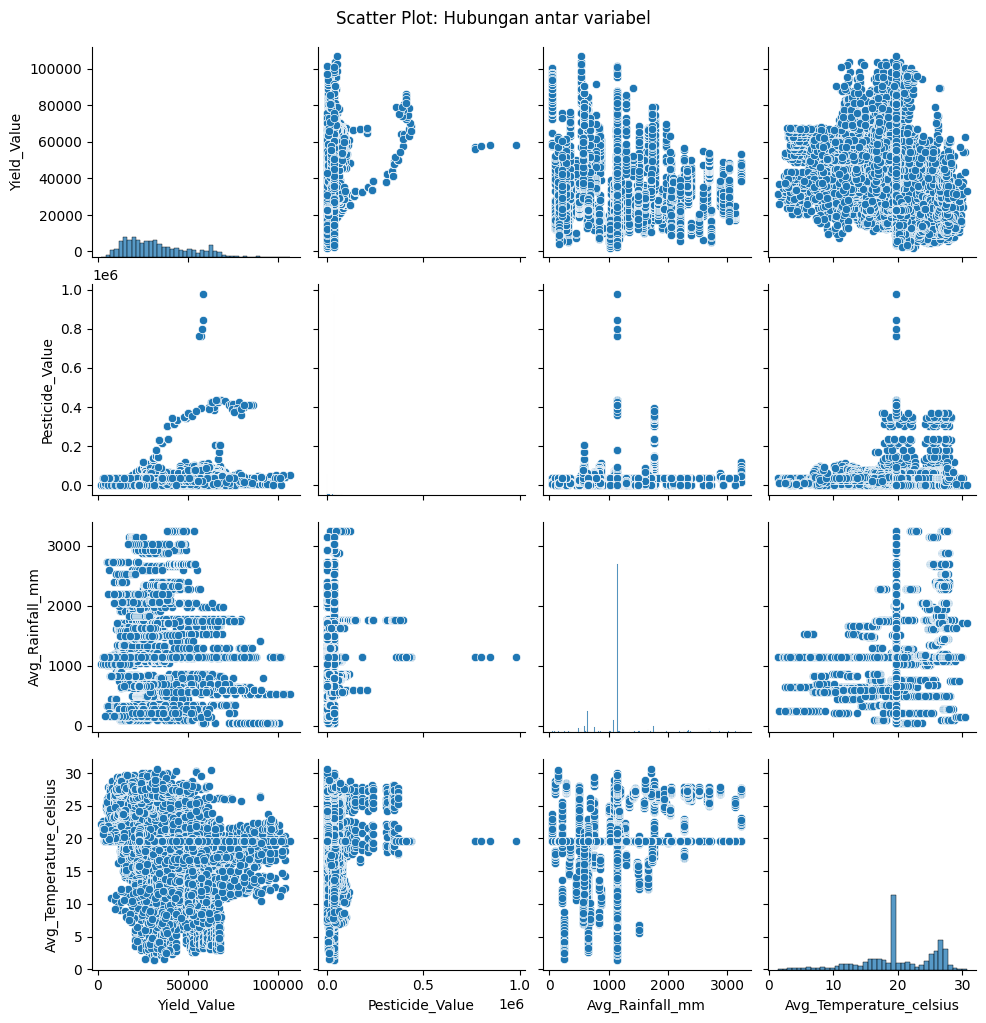

In [ ]:
sns.pairplot(df[numerical_cols])
plt.suptitle("Scatter Plot: Hubungan antar variabel", y=1.02)
plt.show()


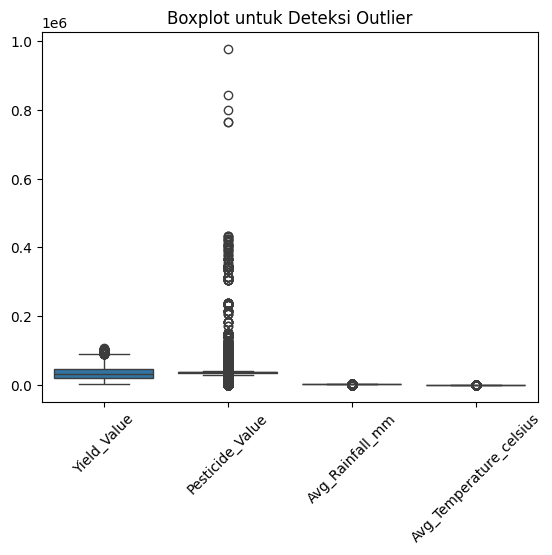

In [ ]:
sns.boxplot(data=df[['Yield_Value', 'Pesticide_Value', 'Avg_Rainfall_mm', 'Avg_Temperature_celsius']])
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

R² Score: 0.019531367843825365
MSE: 340969127.33084834
Intercept: 32422.816968753457
Coefficients: {'Pesticide_Value': np.float64(0.05478775218979107)}


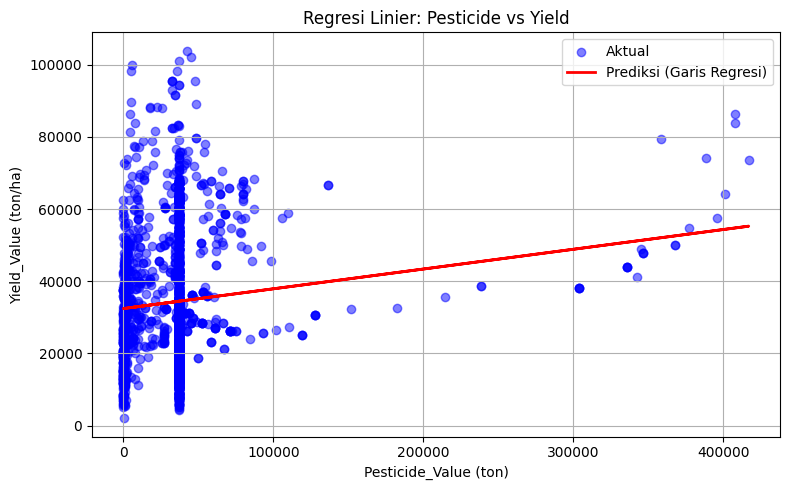

R2 Score: 0.3556298627767629
Mean Squared Error: 224087049.9690493


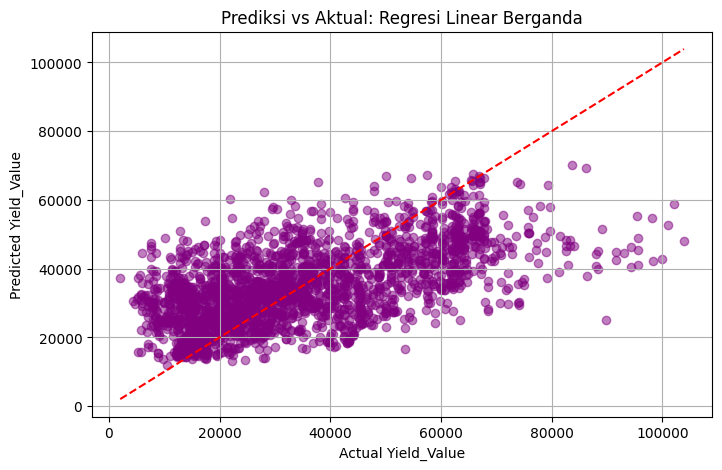

In [ ]:
# Gunakan df_rice sebagai sumber data
X = df[['Pesticide_Value']]
y = df['Yield_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))

# Visualisasi
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Aktual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Prediksi (Garis Regresi)")
plt.xlabel("Pesticide_Value (ton)")
plt.ylabel("Yield_Value (ton/ha)")
plt.title("Regresi Linier: Pesticide vs Yield")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Fitur dan target
X = df[['Year', 'Pesticide_Value', 'Avg_Rainfall_mm', 'Avg_Temperature_celsius']]
y = df['Yield_Value']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Visualisasi Predicted vs Actual
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Garis Prediksi Ideal')
plt.xlabel('Actual Yield_Value')
plt.ylabel('Predicted Yield_Value')
plt.title('Prediksi vs Aktual: Regresi Linear Berganda')
plt.grid(True)
plt.show()